In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

df = pd.read_csv("SMOTEFINAL.csv")

In [5]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


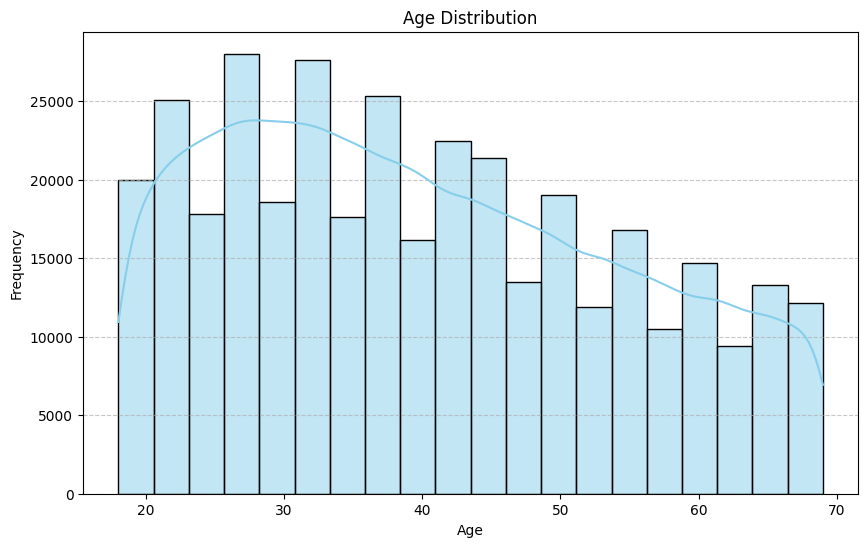

In [11]:
# Create a histogram with colored bars for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue', bins=20)  # Colour selection
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better visualization
plt.show()

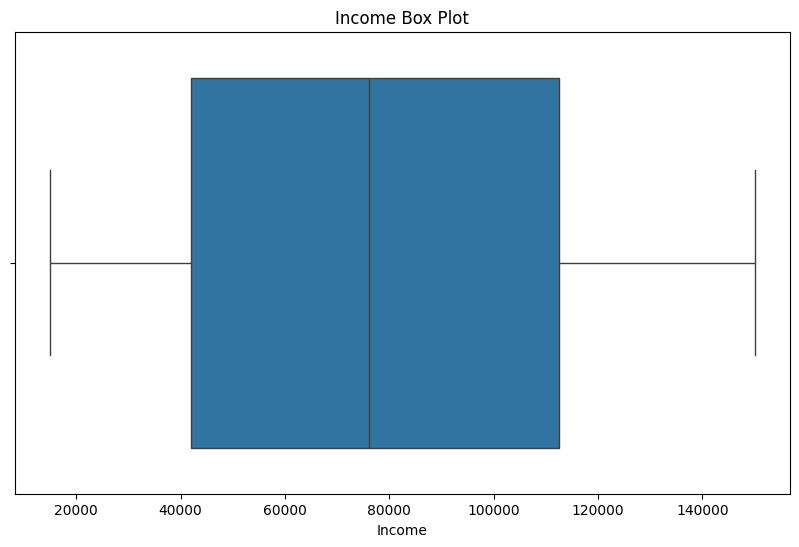

In [7]:
# Example: Box plot for Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income')
plt.title('Income Box Plot')
plt.xlabel('Income')
plt.show()

C:\Users\35387\AppData\Local\Temp\ipykernel_4652\2694224743.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette=custom_palette)


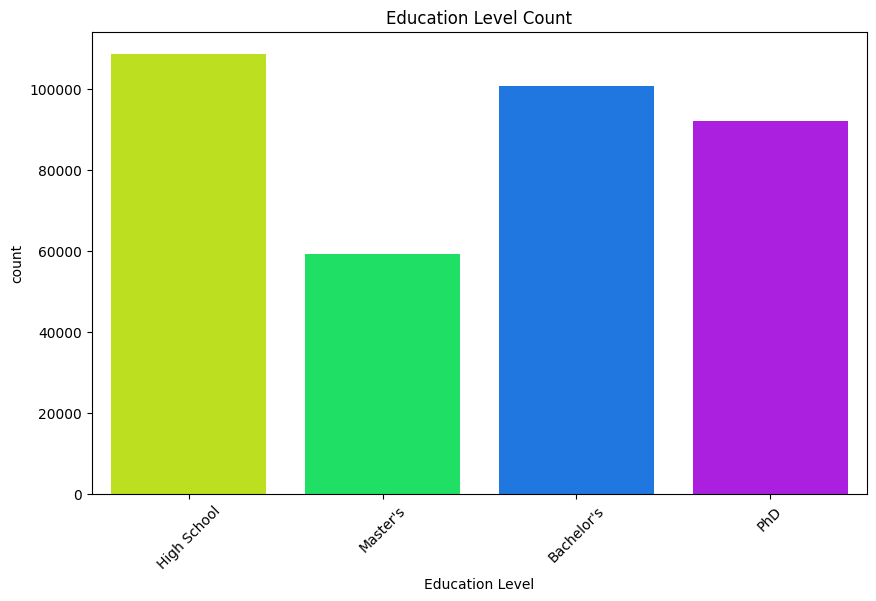

In [13]:
# Create a custom color palette with different colors for each category
unique_education_levels = df['Education'].unique()
n_colors = len(unique_education_levels)
custom_palette = sns.color_palette("hsv", n_colors)

# Create a count plot with a custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette=custom_palette)
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

C:\Users\35387\AppData\Local\Temp\ipykernel_4652\1839914347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_loan_amount, x='Default', y='LoanAmount', palette='Set2')


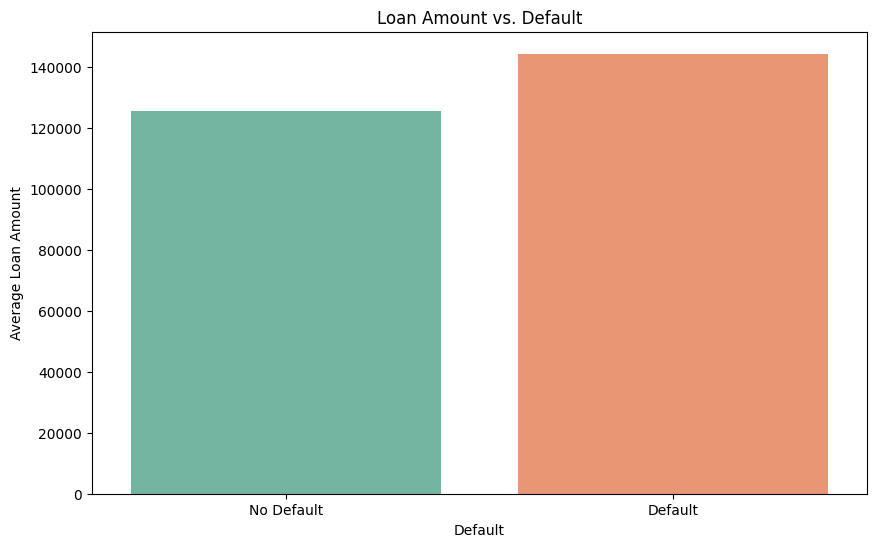

In [20]:
default_loan_amount = df.groupby('Default')['LoanAmount'].mean().reset_index()

# Create a bar plot to visualize the relationship between LoanAmount and Default
plt.figure(figsize=(10, 6))
sns.barplot(data=default_loan_amount, x='Default', y='LoanAmount', palette='Set2')
plt.title('Loan Amount vs. Default')
plt.xlabel('Default')
plt.ylabel('Average Loan Amount')
plt.xticks([0, 1], ['No Default', 'Default'])  # Customizing x-axis labels
plt.show()

In [26]:
# Group the data by 'Education' and 'Default' and calculate the percentage of non-defaulters
education_default_counts = df.groupby(['Education', 'Default']).size().unstack(fill_value=0)
education_percentages = (education_default_counts[0] / education_default_counts.sum(axis=1)) * 100

# Print the percentages
print(education_percentages)

Education
Bachelor's     44.858831
High School    40.903242
Master's       76.268272
PhD            49.460649
dtype: float64


C:\Users\35387\AppData\Local\Temp\ipykernel_4652\2231697358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage_No_Default', y=education_percentages.index, data=education_percentages, palette='viridis')


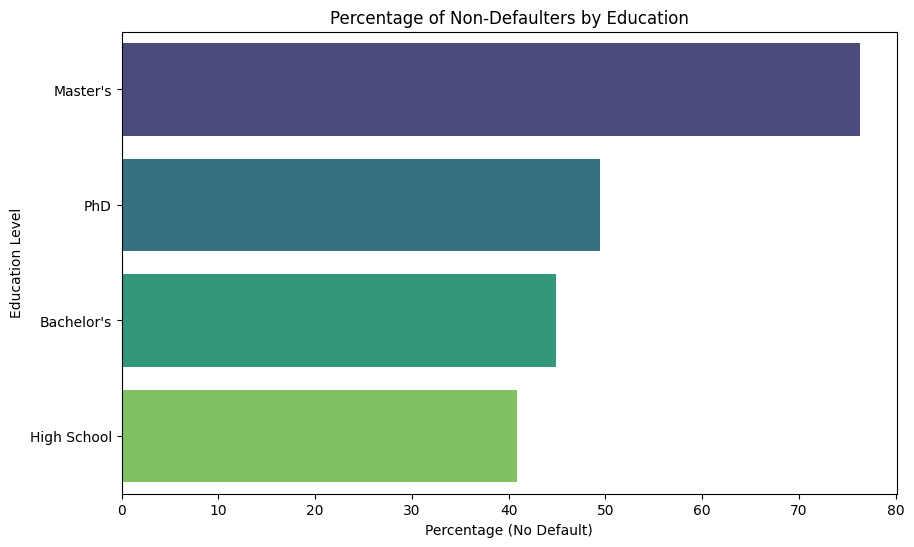

In [27]:
# Calculate the percentage of non-defaulters for each education level
education_percentages = df.groupby(['Education', 'Default'])['Default'].count().unstack(fill_value=0)
education_percentages['Percentage_No_Default'] = (education_percentages[0] / (education_percentages[0] + education_percentages[1])) * 100

# Sort the data by percentage (optional)
education_percentages = education_percentages.sort_values(by='Percentage_No_Default', ascending=False)

# Create a bar plot to visualize the percentage of non-defaulters by education
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage_No_Default', y=education_percentages.index, data=education_percentages, palette='viridis')
plt.title('Percentage of Non-Defaulters by Education')
plt.xlabel('Percentage (No Default)')
plt.ylabel('Education Level')
plt.show()

C:\Users\35387\AppData\Local\Temp\ipykernel_4652\187986564.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage_Default', y=education_percentages.index, data=education_percentages, palette='viridis')


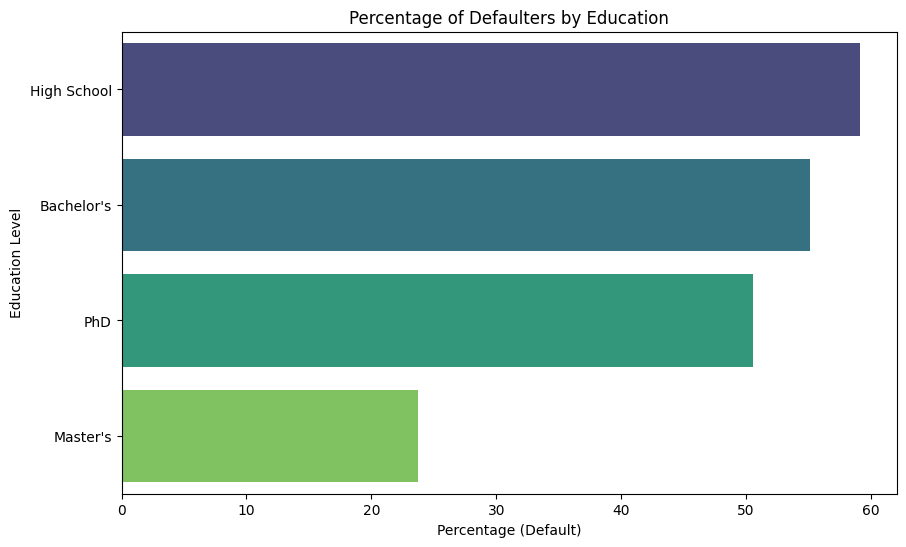

In [28]:
# Calculate the percentage of defaulters for each education level
education_percentages = df.groupby(['Education', 'Default'])['Default'].count().unstack(fill_value=0)
education_percentages['Percentage_Default'] = (education_percentages[1] / (education_percentages[0] + education_percentages[1])) * 100

# Sort the data by percentage (optional)
education_percentages = education_percentages.sort_values(by='Percentage_Default', ascending=False)

# Create a bar plot to visualize the percentage of defaulters by education
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage_Default', y=education_percentages.index, data=education_percentages, palette='viridis')
plt.title('Percentage of Defaulters by Education')
plt.xlabel('Percentage (Default)')
plt.ylabel('Education Level')
plt.show()